### **Clase 8 - Dimensionalidad**

### **`Introducción`**

A lo largo de esta unidad conoceremos y emplearemos algunas técnicas de aprendizaje no-supervisado. Por esto hacemos referencia a la ausencia de información previa sobre los atributos y/o del vector objetivo. Cuando trabajamos desde esta perspectiva, hablamos de "dimensiones latentes" como atributos existentes pero no medibles.

Dos ejemplos de aprendizaje no-supervisado pueden ser las disciplinas de reducción de
dimensionalidad y clustering.

Hablamos de técnicas de reducción de dimensionalidad cuando el objetivo es minimizar una gran cantidad de atributos en una serie de dimensiones sustancialmente menores.

Las técnicas de clustering buscan agrupar los puntos en distintos conjuntos de datos dado reglas de similitud o diferencias.

### **`Importar librerias y carga de archivo`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns
import lec7_graphs as gfx 
import warnings

warnings.filterwarnings(action="ignore") 
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('cep45.csv')

### **`Maldición de la dimensionalidad`**

#### **1 - Introducción**

Los algoritmos que implementamos operan en un número ﬁnito de dimensiones que se establecen en una serie de espacios d-dimensionales, un problema en varias áreas relacionadas a las que estamos estudiando surge cuando este número de dimensiones aumenta mucho en comparación con la cantidad de ejemplos, al aumentar la dimensionalidad en la que se representan los datos el “volumen” del espacio aumenta de forma exponencial ya que la cantidad de combinaciones posibles entre los valores que pueden tomar las dimensiones (columnas) de los ejemplos de la muestra es mucho mayor a la cantidad de ejemplos en la misma, por lo tanto, puntos en este espacio hiperdimensional estarán dispersos (manteniendo en nuestro ejemplo siempre una cantidad constante de ejemplos en la muestra). Este fenómeno se conoce como la maldición de la dimensionalidad.

El problema es que la convergencia de cualquier estimador al parámetro verdadero de una función deﬁnida en un espacio d-dimensional es muy lento dado al exceso de atributos y falta de observaciones. Ejempliﬁquemos la distancia entre puntos cuando aumentamos la cantidad de dimensiones. Para ello implementamos la función sim_distance.

La función simula una serie ﬁnita de 1000 puntos aleatorios en un cubo y estima sus distancias. Evaluaremos la función cuando tenemos 2, 10, 100 y 1000 atributos. La función retorna un histograma de la distancia y la recta roja señala la media de la distancia. En la medida que aumentamos artiﬁcialmente la cantidad de dimensiones, la distancia promedio entre dos puntos aumenta substancialmente.

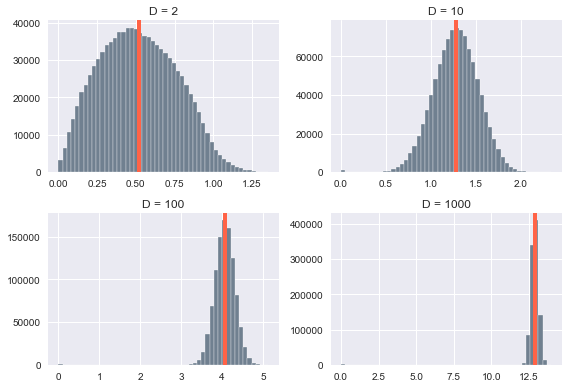

In [2]:
for i, e in enumerate([2, 10, 100, 1000]): 
    plt.subplot(2,2, i+1) 
    gfx.sim_distance(e)
    plt.tight_layout()


##### **`Digresión: Bendiciones de la dimensionalidad`**

No todo lo asociado con la dimensionalidad es negativo. Donoho (2000) sugiere que un problema a investigar con más dimensiones que observaciones permite concentrar las mediciones en dimensiones que capturen distintos aspectos de los atributos.

##### **`Trabajando con la dimensionalidad`**

Existen dos escuelas de análisis frente a la dimensionalidad. Una escuela psicométrica, enfocada en la identiﬁcación de "factores causales" condicionales a un conjunto d >> n de datos. La otra escuela, más cercana a las ciencias de la computación busca redimensionar los factores latentes mediante la maximización de la varianza.

### **`Análisis Factorial: La visión psicométrica`**

#### **1 - Introducción**

El análisis factorial busca extraer información sobre la variabilidad del conjunto ﬁnito de variables, y transformarla en una serie de factores latentes (o no-observables empíricamente). Para ello, el análisis busca la variación conjunta de dos variables en respuesta a un factor especíﬁco. Las variables observadas se modelan como una combinación lineal de los factores y errores.

Si deseamos analizar cómo una serie de variables observadas **X** están asociadas de forma lineal a una cantidad ﬁnita de factores **f**, empleamos el siguiente sistema de ecuaciones.

$$ X_1 = λ_{10} + λ_{11}f_{1} + ... + λ_{1k}f_{k} + \varepsilon_1  $$
$$ X_2 = λ_{20} + λ_{21}f_{1} + ... + λ_{2k}f_{k} + \varepsilon_2  $$
$$ ... $$
$$ X_N = λ_{n0} + λ_{n1}f_{1} + ... + λ_{nk}f_{k} + \varepsilon_n  $$

Donde $λ$ representa la carga asociada a la combinación lineal y ε representa el error en la medición del constructo.

#### **2 - Implementando un análisis de factores con factor_analyzer**

A lo largo de esta sección, trabajaremos con una encuesta del Centro de Estudios Públicos realizada en Junio del 2003. Parte de la batería de preguntas está asociada a preguntas sobre el nivel de conﬁanza institucional.

Las preguntas se reﬁeren la evaluación en una serie de instituciones de la sociedad civil, tales como:

-	`p17_a`: La Iglesia Católica.
-	`p17_b`: La Iglesia Evangélica.
-	`p17_c`: Las Fuerzas Armadas.
-	`p17_d`: Los Tribunales de Justicia.
-	`p17_e`: La Prensa Escrita.
-	`p17_f`: La Televisión.
-	`p17_g`: Los Sindicatos.
-	`p17_h`: Los Carabineros.
-	`p17_i`: El Gobierno.
-	`p17_j`: Los Partidos Políticos.
-	`p17_k`: El Congreso.
-	`p17_l`: Las Empresas.
-	`p17_m`: Las Universidades.
-	`p17_n`: La Radio.


Cada una de estas preguntas se evaluó en una escala entre 1 (Mucha Conﬁanza), 2 (Bastante Conﬁanza), 3 (No Mucha Conﬁanza), 4 (Ninguna Conﬁanza). Las categorías 8 (No sabe), 9 (No contesta) representan valores perdidos.

Para implementar un análisis factorial en Python, utilizaremos la librería factor_analyzer.


##### **`Digresión: Instalando librerías con conda-forge`**

Dado que la cantidad de librerías que se generan en Python, el administrador conda por defecto no logra incluir todas las librerías. En el caso que queramos instalar nuevas librerías, podemos utilizar el terminal.
```
conda install -c conda-forge <nombrelibreria>
```

Para este caso, importamos las librerías factor_analyzer y missingno, para realizar análisis factorial y visualizar patrones de datos perdidos, respectivamente.
```
conda install -c desilinguist factor_analyzer

conda install -c conda-forge missingno
```

Hay una característica no menor del análisis factorial: `las variables deben compartir la misma escala`. Para este ejemplo no es un problema mayor, dado que emergen de un diseño estadístico deliberado y las variables contienen una estructura coherente. Aún así, podríamos estar ante la eventualidad de variables en distintas escalas. Una alternativa viable es estandarizar todas las variables a incorporar en el análisis factorial.

##### **`Digresión: Estandarizando un conjunto de variables`**

Ante la eventualidad de estandarizar, la opción más viable es mapear una función a lo largo del conjunto de variables. Esto se puede lograr con:

In [ ]:
df.loc[:, 'conjunto':'variables'].applymap(lambda x: stats.zscore(x))

Importemos la base de datos:

In [5]:
import factor_analyzer as factor
import missingno as msngo

Nuestro objetivo es pre procesar y analizar la batería de preguntas asociadas a la conﬁanza institucional. Para ello nos enfocaremos en el comportamiento empírico de las variables y en las tasas de valores perdidos.

Dado que trabajaremos de manera reiterada con este conjunto, una buena práctica es separarlo en un nuevo objeto. Ya sabemos cómo segmentar columnas con `loc`, ahora lo haremos con `filter`. Dentro de los argumentos de `filter` implementaremos la opción regex, que emplea expresiones regulares para encontrar patrones comunes entre strings. Para este caso emplearemos un asterisco como comodín.
Con nuestra batería seleccionada, graﬁquemos el comportamiento de las respuestas utilizando `iteritems()` como un orientador del loop. Se observa que a lo largo de todas las preguntas las tasas de no respuesta son bajas, no superando el 1% del total de las observaciones.

In [6]:
# filtramos las columnas
trust_df = df.filter(regex="p17_*")

trust_df = trust_df.rename(columns={'p17_a': 'I.Catolica', 'p17_b': 'I.Evangelica', 'p17_c': 'FFAA', 'p17_d': 'Justicia',
'p17_e': 'Prensa', 'p17_f': 'Television', 'p17_g':'Sindicatos', 'p17_h':'Carabineros',
'p17_i': 'Gobierno', 'p17_j': 'PartidosPol', 'p17_k': 'Congreso', 'p17_l':'Empresas',
'p17_m':'Universidades', 'p17_n':'Radio'})

In [25]:
trust_df.head()

,I.Catolica,I.Evangelica,FFAA,Justicia,Prensa,Television,Sindicatos,Carabineros,Gobierno,PartidosPol,Congreso,Empresas,Universidades,Radio
0,2,4,3,2,3,3,3,4,3,3,2,3,2,2
1,2,3,3,3,3,3,2,2,3,4,3,3,3,3
2,4,4,4,4,3,3,4,4,4,4,4,3,4,2
3,1,3,2,2,3,2,3,3,3,4,3,3,3,3
4,3,3,2,1,2,2,1,1,2,3,2,2,2,2


In [7]:
def fetch_missing(df, missing_vals):
    for colname, serie in df.iteritems(): 
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

fetch_missing(trust_df, missing_vals=[8, 9])

I.Catolica 0.03
I.Evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
Television 0.02
Sindicatos 0.09
Carabineros 0.02
Gobierno 0.03
PartidosPol 0.03
Congreso 0.05
Empresas 0.04
Universidades 0.07
Radio 0.03


La función matrix dentro de la librería `missingno` permite visualizar la matriz de datos, las líneas en blanco representan respuestas perdidas (o negadas) por el encuestado. De manera similar a lo entregado por nuestra función `fetch_missing`, las preguntas con mayores niveles de perdidos son `p17_b` (La Iglesia Evangélica), `p17_g` (Los Sindicatos), `p17_m` (Las Universidades).

Esperamos que estas variables presenten cargas bajas en los factores. Este punto será retomado posteriormente.

<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

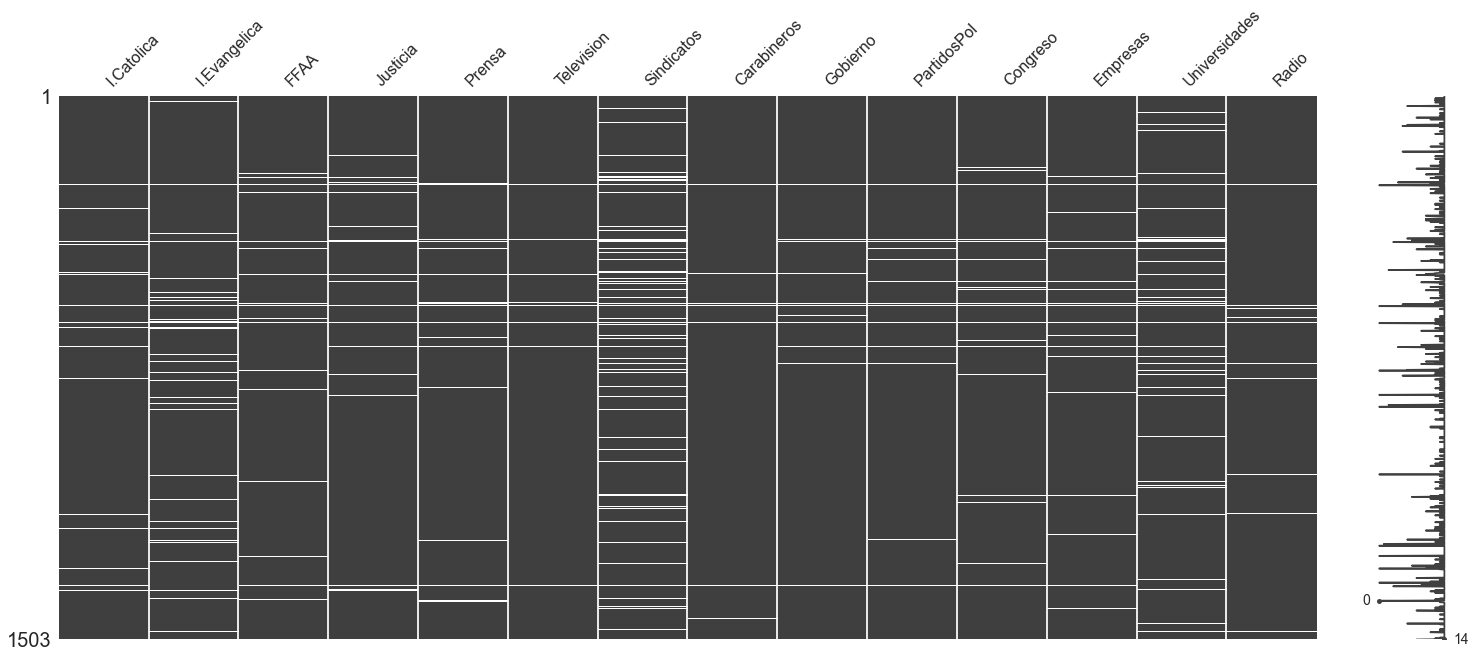

In [8]:
plt.figure(figsize=(4,4)) 
msngo.matrix(trust_df.replace([8, 9], [np.nan, np.nan]))

Una vez analizado el patrón de datos perdidos, optamos por eliminarlos y procedemos con inspeccionar las medias de cada variable en la batería de preguntas mediante un dotplot.

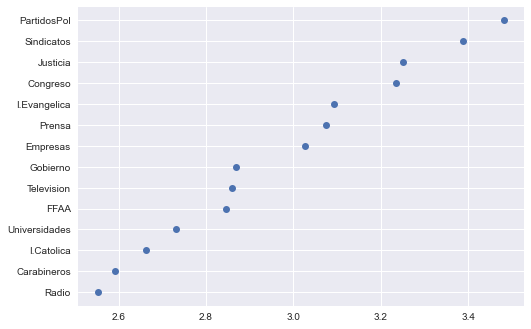

In [9]:
# Generamos dos arrays vacíos para guardar el nombre de la variable y la media
variable = [] 
mean = []

# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in trust_df.iteritems(): 
    # guardamos el nombre en variable 
    variable.append(colname)
    # calculamos y procesamos la media 
    mean.append(serie.mean())

df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean']) 
plt.plot(df['mean'], df['var'],'o')

Este lo hicieron en clase:

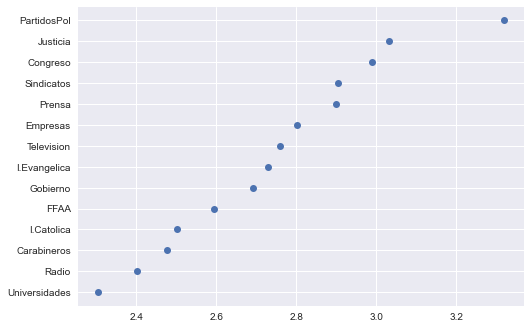

In [33]:
df_mean = trust_df.replace([8, 9], [np.nan, np.nan]).mean().reset_index().rename(columns={'index':'var', 0:'mean'}).sort_values('mean')
plt.plot(df_mean['mean'], df_mean['var'],'o')

Recordemos que valores más altos en la escala de conﬁanza signiﬁca que la sociedad confía menos en las instituciones. En un extremo observamos a instituciones de carácter político como los Partidos Políticos, los Tribunales de Justicia, el Congreso y los Sindicatos.

En el otro extremo encontramos a instituciones "cotidianas", aquellas que presentan un mayor grado de interacción con las personas como los Carabineros, la Iglesia Católica y la Radio. Esto entrega indicios sobre dos grupos de instituciones.

Antes de modelar los factores latentes de nuestro modelo, es necesario realizar un par de pruebas sobre la idoneidad de nuestra matriz de datos para extraer factores. Las pruebas de esfericidad de Barlett y de muestreo de Kaiser-Meyer-Olkin entregan información sobre el grado de covarianza entre variables en la batería de preguntas. Si nos encontramos ante casos donde las cargas en la matriz de covarianza son bajas y/o responden a otras estructuras de datos, es preferible implementar otros enfoques que escapan a los objetivos del curso.

#### **3 - Prueba de esfericidad de errores de Bartlett**

Debemos preguntarnos si nuestra matriz de correlaciones entre los atributos es o no una matriz de identidad (matriz donde la diagonal principal es de 1 y los triángulos superiores e inferiores son 0), de ocurrir eso estaríamos viendo columnas completamente perpendiculares entre sí, por lo tanto, no comparten información en común *1. Un supuesto clave sobre la estructura de nuestra matriz de datos y que requerimos para justiﬁcar el proceso de extracción de factores latentes es que parte de la varianza de nuestras variables sea común entre ellas (o al menos entre algunas de ellas).

En esta prueba, la hipótesis nula es que la matriz de correlaciones entre las variables de nuestra matriz es una matriz identidad, mientras que la hipótesis alternativa es que esta es distinta a una identidad. De manera similar a las otras pruebas de estadísticos de ajuste, si encontramos evidencia para fallar en rechazar la hipótesis nula con un cierto grado de conﬁanza (90%, 95% o 99%, por ejemplo), la prueba concluye que la matriz sigue una distribución multivariada normal, no una matriz de identidad, por lo que se puede proceder con el análisis de factores.

Para implementar la prueba dentro de Python, utilizamos el método `calculate_bartlett_sphericity` de la librería `factor_analyzer` en nuestra batería de preguntas. La prueba retorna el valor del estadístico de contraste `chi-square` y un `p-value` asociado a ese estadístico. En este caso, la prueba de esfericidad sugiere que la matriz de correlaciones no es igual a la matriz de identidad con un grado suﬁcientemente alto de conﬁanza (de hecho tan pequeño fue el pvalor que se nos entregó aproximado simplemente a 0.0), por lo que se puede seguir con el análisis.

- $H_0$ = La matriz de correlaciones es una matriz de identidad (Hipótesis nula)
- $H_1$ = La matriz de correlaciones no es una matriz de identidad (Hipótesis alternativa)

In [34]:
import factor_analyzer as fact

statistic, p_valor = fact.calculate_bartlett_sphericity(trust_df)

statistic, p_valor

(6644.835705911964, 0.0)

*1 La razón por la que la diagonal principal de esa matrix estaría compuesta por unos mientras que las matrices triangulares superior e inferior son nulas, es porque esto signiﬁca que cada par de variables tienen correlación de 0 entre sí, sin embargo, una variable tiene correlación de 1 consigo misma.

Claramente no es una matriz de identidad:

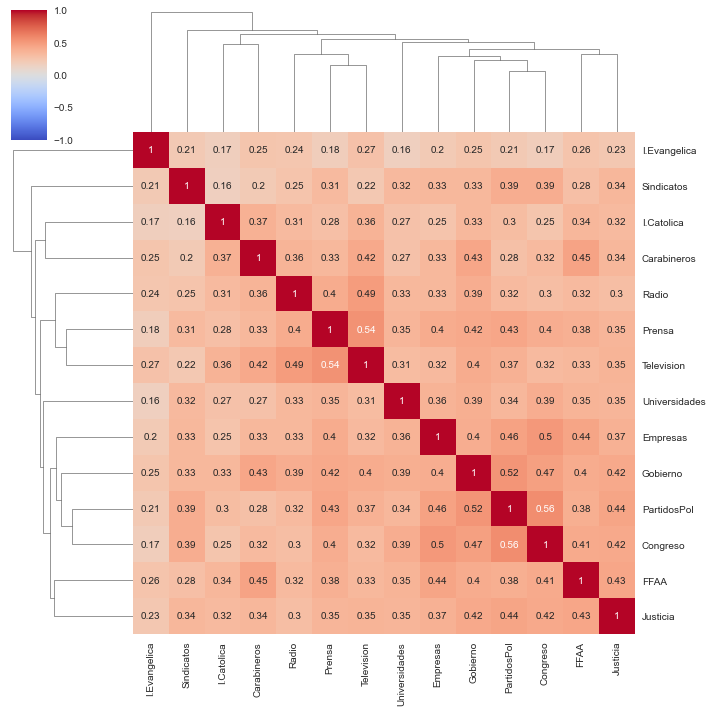

In [36]:
sns.clustermap(trust_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#### **4 - Prueba de muestreo Kaiser-Meyer-Olkin (KMO)**

De manera adicional a la prueba de Bartlett, podemos medir si las correlaciones parciales dentro de la matriz son cercanas a 0. De ser este el caso, la prueba sugiere la existencia de por lo menos un factor latente dentro de la batería de preguntas.

Se puede implementar mediante el método `calculate_kmo` de la librería `factor_analyzer`. El método devuelve el puntaje KMO para cada ítem dentro de la batería, así como un puntaje global para todos los items.

Se sugiere que para seguir con el análisis factorial, el KMO debe presentar valores superiores a 0.7. En este caso se satisface el punto y podemos proseguir.

Ante el caso en que encontremos puntajes bajos, la estructura a estimar se puede mejorar al eliminar los ítems con cargas KMO inferiores al puntaje de corte.

La eliminación de estos ítems permite liberar la matriz de elementos inestables que diﬁculten la identiﬁcación de los factores a extraer.

- Hay correlaciones mayores a 0 entre las diferentes variables
- Tenemos 14 variables, por tanto me entrega 14 valores de KMO
- 0.927465719411127 corresponde al valor global. Como este valor es > a 0.7 nosotros podemos decir que claramente existen factores latentes

In [11]:
fact.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]),
 0.927465719411127)

Ejemplo:

In [37]:
random_dataset = pd.DataFrame(np.random.rand(1000, 3))
print(pd.DataFrame(random_dataset.corr()))
fact.calculate_kmo(random_dataset)

          0         1         2
0  1.000000  0.048303 -0.073699
1  0.048303  1.000000  0.042184
2 -0.073699  0.042184  1.000000


(array([0.47919584, 0.46243895, 0.47769907]), 0.4749258442633766)

In [39]:
random_dataset.tail()

,0,1,2
995,0.399214,0.254476,0.694907
996,0.827567,0.395285,0.297964
997,0.230070,0.491768,0.464476
998,0.409224,0.568998,0.880104
999,0.714462,0.632606,0.045589


Podemos decir según el valor global que no existen factores latentes entre las 3 variables

#### **5 - Estimando la cantidad de factores a extraer**

Posterior al análisis de la idoneidad de nuestra matriz de datos para el análisis factorial, la siguiente pregunta a responder es ¿qué tantos factores necesitamos?

Para ello podemos analizar los valores propios (eigenvalues) de la descomposición de la matriz. Estos informan qué tanta varianza se puede atribuir un factor en especíﬁco. Mediante la deﬁnición de qué tantos factores necesitamos para caracterizar una matriz podemos obtener una estructura parsimoniosa e interpretable.

La manera más simple de analizar esto es mediante un scree plot, que visualiza los eigenvalues en la medida que se aumenta la cantidad de factores. Por convención no pueden existir más factores que variables dentro de la matriz.

Comencemos por implementar un modelo con `factor_analyzer`.

-	Nuestro objeto instanciado, podemos implementar el análisis con `factorize.analyze`. El primer parámetro (`data`) que debe ser ingresado es la matriz a descomponer. El segundo parámetro (`n_factors`) es la cantidad de factores a extraer. Por último, `method` hace referencia a la rotación aplicada en la matriz de cargas. Implementaremos la estrategia más simple conocida como `varimax`.

-	Con las cargas λ podemos estimar una matriz de covarianza Λ para calcular la matriz de covarianza observable. Asumiendo el cumplimiento de los supuestos, se asume que Λ es un buen aproximado de la covarianza observable.

-	Por lo general empleamos Análisis de Componentes Principales para estimar la comunalidad total de la matriz.

-	Las cargas λ no tienen una identiﬁcación única, por lo que se puede emplear una "rotación" de la matriz para encontrar una mejor estructura latente. Están los métodos ortogonales (que no permiten correlación entre factores) y oblicuos (que sí permiten correlación entre factores). Algunas de las más utilizadas son:

    -	`Varimax`: Rotación que busca maximizar la varianza de las cargas para cada factor.

    -	`Quartimax`: Rotación que busca maximizar la varianza de las cargas y tiende a producir cargas más altas para cada variable.
 
-	Para generar el scree plot, extraemos los eigenvalues reportados en `factorize.get_eigenvalues()[0]` y los graﬁcamos contra la cantidad de factores estimables.

¿Como obtener los factores latentes?

In [52]:
# Generamos una nueva instancia en el objeto factorize 
factorize = fact.FactorAnalyzer(n_factors=2) 
# Implementamos el análisis
factorize.fit(trust_df) 
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]

In [55]:
factor_screeplot

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

- El valor `5.49842419` lo que me dice es que este factor latente me captura la varianza de 5 variables y asi con las otras

In [49]:
# Si sumo todos esos valores es igual a 14, el numero de variables
sum(factor_screeplot)

13.999999999999995

Text(0.5, 1.0, 'Scree plot')

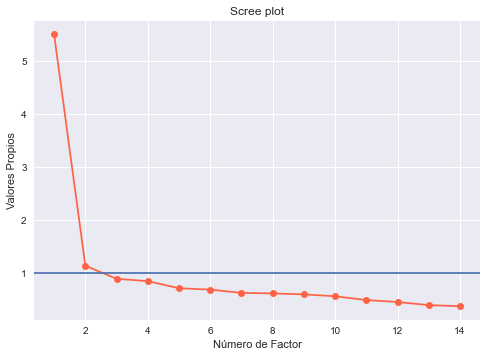

In [50]:
# graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.plot(range(1, factor_screeplot.shape[0] + 1), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor') 
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte 
plt.axhline(1)
plt.title("Scree plot")

`A modo de guía`: Un factor con valor propio de exactamente 1 signiﬁca que ese factor explica una parte de la varianza igual a la de una variable, de forma análoga, un factor con valor propio mayor/menor a 1 explica una varianza total mayor/menor a la de una sola variable.

La convención indica que se deben preservar todos los factores con `eigenvalues` mayores a 1. De esta forma maximizamos la cantidad de varianza explicada por la matriz. Los resultados indican que hay 2 dimensiones sustanciales.

##### **`Digresión: Sobre los criterios de elección del número de factores`**

Si bien en esta ocasión utilizamos el valor propio de los factores como criterio de selección, cabe destacar que no existe una regla clara a la hora de escoger la cantidad de factores a preservar y todo depende de lo que veamos en el gráﬁco, por ejemplo, otra regla común para esta tarea es ﬁjarse en el 'codo' de la curva en el scree plot, si nos ﬁjamos, la curva parece disminuir la pendiente a valores cercanos a 0 en el factor 3, por lo que podemos tomar ese punto como límite para los factores con los que nos quedaremos, en este caso, con los factores 1 y 2.

#### **6 - Extracción e interpretación de los factores**

La evidencia apunta que nuestro modelo está correctamente especiﬁcado, y tenemos 2 grandes dimensiones no observables. Para extraer los resultados sobre qué preguntas están asociadas entre sí, podemos solicitar las cargas λ en cada factor con `factorize.loading`.

In [54]:
factor_loadings = factorize.loadings_
print(factor_loadings.shape)
print(factor_loadings)

(14, 2)
[[-0.00606221  0.5309732 ]
 [ 0.06578969  0.31599554]
 [ 0.34283819  0.3281199 ]
 [ 0.45383651  0.19986893]
 [ 0.22914628  0.45086225]
 [-0.14495462  0.83269491]
 [ 0.58749125 -0.06519098]
 [-0.0067893   0.62601668]
 [ 0.42493375  0.30851975]
 [ 0.74100403 -0.01945788]
 [ 0.86817912 -0.15757661]
 [ 0.58873065  0.07625493]
 [ 0.40397717  0.18097999]
 [-0.01982071  0.6363569 ]]


In [56]:
factor_loadings = pd.DataFrame(factor_loadings)
factor_loadings.columns = ['Factor1', 'Factor2']
factor_loadings.index = trust_df.columns

factor_loadings

,Factor1,Factor2
I.Catolica,-0.006062,0.530973
I.Evangelica,0.065790,0.315996
FFAA,0.342838,0.328120
Justicia,0.453837,0.199869
Prensa,0.229146,0.450862
Television,-0.144955,0.832695
Sindicatos,0.587491,-0.065191
Carabineros,-0.006789,0.626017
Gobierno,0.424934,0.308520
PartidosPol,0.741004,-0.019458


La información presentada en la matriz no es muy clara. Emplearemos un par de métodos para simpliﬁcar su interpretación:

1.	El método `applymap` permite aplicar una función a una serie de columnas. En este caso implementaremos una función `lambda` en ambas columnas.

2.	El primer elemento a emplear es reemplazar los valores con un string vacío cuando sus cargas sean menores a 0.4. La lógica de excluir cargas menores es limpiar cargas bajas con cada factor y simpliﬁcar la estructura. Esto lo logramos con `np.where`.

3.	El segundo elemento es redondear las cargas en aquellos elementos sustanciales con `round`.

In [57]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2
I.Catolica,,0.53
I.Evangelica,,
FFAA,,
Justicia,0.45,
Prensa,,0.45
Television,,0.83
Sindicatos,0.59,
Carabineros,,0.63
Gobierno,0.42,
PartidosPol,0.74,


Las cargas señalan que el Factor 1 se compone de instituciones explícitamente políticas, donde destacan el Poder Judicial, los Sindicatos, El Gobierno, Los Partidos Políticos, el Congreso, las Empresas y Universidades. Este factor se puede denominar como conﬁanza en los elementos más políticos de las instituciones.

El Factor 2 presenta cargas altas asociadas a la Iglesia Católica, Prensa, Televisión, Carabineros y Radio. A diferencia del primer factor, en este predominan los elementos más cotidianos de la sociedad. Estas son las instituciones con las cuales se interactúa de una manera más frecuente.

Ambos factores están asociados y se pueden presentar en un diagrama de dispersión. Este muestra que ambos se sitúan en una relación inversa. Los valores más altos en el Factor 1 están asociados a valores bajos en el Factor 2.

Text(0, 0.5, 'Factor 2: 0.17')

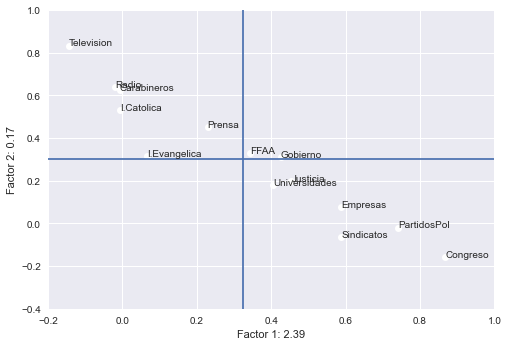

In [60]:
# guardemos la varianza explicada por cada dimensión 
factor_var = factorize.get_factor_variance()
# cruzamos ambos factores 
plt.plot(factor_loadings.Factor1, factor_loadings.Factor2,'o',color='white') 
# definimos límites
plt.xlim((-.2,1))  
plt.ylim((-.4, 1))
# Para cada elemento en los factores
for i, txt in enumerate(factor_loadings.index): 
    # anotemos el nombre de la variable
    plt.annotate(txt, (factor_loadings['Factor1'][i], factor_loadings['Factor2'][i])) 
# Grafiquemos la media de ambos factores 
plt.axvline(factor_loadings['Factor1'].mean()) 
plt.axhline(factor_loadings['Factor2'].mean())
# Reportemos la varianza de cada dimensión
plt.xlabel('Factor 1: {}'.format(round(factor_var[0][1], 2)))
plt.ylabel('Factor 2: {}'.format(round(factor_var[1][1], 2)))

##### **`¿Cuánto explica cada factor?`**

Resulta que cada dimensión estimada busca maximizar la varianza de la matriz. Podemos obtener la varianza explicada de cada dimensión con `get_factor_variance`. En este caso observamos que con dos dimensiones capturamos un 36% de la varianza de la matriz entre ambas dimensiones, lo cual suena bastante bajo.

De acá se desprende un tema no menor. De manera similar a nuestras técnicas de aprendizaje automatizado donde debemos vigilar la capacidad de generalización del modelo mediante el trueque Sesgo-Varianza.

Mientras que un modelo con más dimensiones puede aumentar la cantidad de varianza explicada, se hace a expensas de generar un modelo menos parsimonioso y difícil de interpretar.

In [61]:
factor_var = factorize.get_factor_variance() 
factor_var

(array([2.74016741, 2.38611241]),
 array([0.19572624, 0.1704366 ]),
 array([0.19572624, 0.36616284]))

In [64]:
factor_var = pd.DataFrame(factor_var)
factor_var.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']

factor_var

,Factor1,Factor2
SS Loadings,2.740167,2.386112
Proportion Var,0.195726,0.170437
Cumulative Var,0.195726,0.366163


#### **7 - Extracción de puntajes**

Cada factor se presentaba como la combinación lineal entre las cargas y las respuestas de cada ítem. Como tal, se pueden extraer los puntajes estimados entre ambos elementos mediante el método transform para cada factor generado.

Éstos puntajes vienen dados por la estandarización de los factores, por lo que tendrán una distribución $\hat 𝑋 ∼ 𝑁 (0, σ^2)$.

Los puntajes pueden ser utilizados posteriormente en modelos predictivos como variables dependientes y/o independientes, así como en la creación y construcción de índices compuestos.

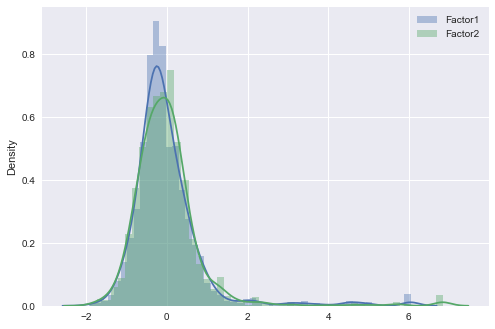

In [68]:
extract_factor_scores = factorize.transform(trust_df) 
sns.distplot(extract_factor_scores[:,0], label='Factor1') # Institucionalistas
sns.distplot(extract_factor_scores[:,1], label='Factor2') # Cotidianos
plt.legend()

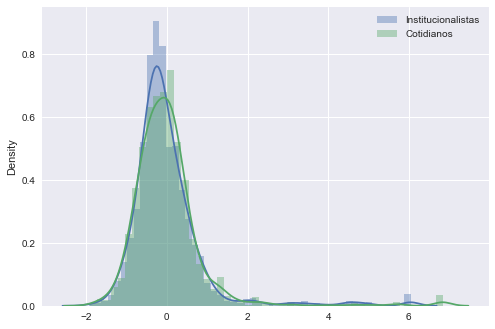

In [69]:
extract_factor_scores = factorize.transform(trust_df) 
sns.distplot(extract_factor_scores[:,0], label='Institucionalistas') 
sns.distplot(extract_factor_scores[:,1], label='Cotidianos') 
plt.legend()

### **`Dimensionalidad desde Machine Learning`**

#### **1 - Análisis de Componentes Principales**

A diferencia del análisis de factores, el Análisis de Componentes Principales no es un método analítico, pero un método de transformación lineal ortogonal que mapea los datos originales en un nuevo sistema de coordenadas que busca maximizar la varianza de las extrapolaciones.

Por lo general el análisis busca representar un conjunto N-dimensional de datos en un primer eje (aquél que maximize más la varianza), y un segundo eje (el segundo componente que maximice la varianza).

Si tenemos una matriz de datos originales X, podemos obtener la matriz transformada 𝑋 mediante un argumento de transformación lineal P, que generalmente toma una forma geométrica (rango y rotación).

$$ \hat X = P \times X $$

$$ \text {X = Matriz de datos redimensionada} $$
$$ \text {P = Transformación lineal: Rango y Rotación} $$
$$ \text {X = Matriz de datos original} $$

El Análisis de Componentes Principales busca reducir la redundancia de los datos entre una serie de expansiones basales candidatas. Aquella que aproxime su matriz de covarianza a una matriz diagonal (entradas diagonales cercanas a 1 y triángulos cercanos a 0), se denomina como el primer componente principal.

El proceso se itera, rankeando todas las expansiones basales en términos de maximización de varianza y reducción de redundancia de datos. El proceso se ilustra en la ﬁgura `gfx.pca_variance()`.

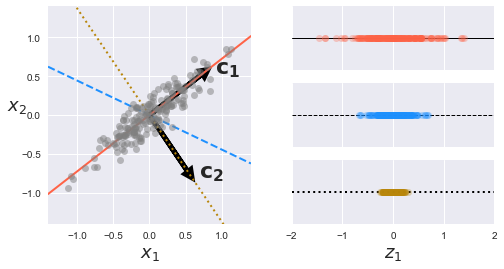

In [70]:
gfx.pca_variance()

En el gráﬁco izquierdo se presenta un diagrama de dispersión entre dos variables $𝑥_1$ y $𝑥_2$ que presentan una relación bivariada positiva. El objetivo del análisis de componentes principales es obtener dimensiones que capturen y mapeen la varianza conjunta.

En el siguiente caso se presentan 3 rectas asociadas a los principales eigenvalues. En el lado derecho del gráﬁco se presenta la cantidad de varianza capturada (dado $𝑧_1$) por cada una de las dimensiones.

La recta roja se posiciona como la dimensión que captura una parte substancial de la varianza conjunta entre $𝑥_1$ y $𝑥_2$, dado que pasa de a lo largo de la tendencia. En segundo lugar, la recta amarilla captura una mayor parte de la varianza en comparación a la tercera dimensión representada en la recta azul.

Optamos por la recta amarilla por sobre la azul dado que ésta preserva la ortogonalidad de la matriz de datos (existe un ángulo de 90 grados entre ambas, lo cual implica que no hay covarianza entre éstas dimensiones).

Supongamos que deseamos restringir nuestra reducción a las dos principales dimensiones que maximicen la varianza capturada. Nuestro criterio de selección mantendría las rectas roja (asignándole un $𝑐_1$) y amarilla (asignándole un $𝑐_2$)

Existen una serie de supuestos asociados:

-	`Linealidad`: La nueva expansión basal es una expresión lineal de la base original.

-	`Media y varianza`: Media y varianza son estadísticas suﬁcientes para describir la distribución empírica de los datos. $𝑁(0, σ^2)$ es idóneo.

-	`SNR (Signal Noise Ratio)`: PCA asume que las dinámicas tienen un alto rango de señal por sobre ruido (es un método varianza-dependiente).

-	`Ortonormalidad de los componentes`: tienen norma 1 y producto de 0.

#### **2 - Digresión: Descomposición de Valores Singulares (SVD)**

Otra alternativa para encontrar los eigenvalues de una matriz de datos es mediante la descomposición de valores singulares. Esta busca separar la matriz en tres componentes, siguiendo la fórmula:

Donde:

-	$𝑈$ es una matriz `n x n` que representa la matriz ortogonal de las columnas.
-	$Σ$ es una matriz `n x m` que representa la matriz diagonal.
-	$𝑉$ es una matriz `m x m` que representa la matriz ortogonal de las ﬁlas.


El efecto de esta última es generar una medición de la importancia relativa de cada columna y ﬁla de la matriz `X`.

La principal diferencia entre PCA y SVD es que la primera obtiene las dimensiones mediante la maximización de la varianza en `d` dimensión, y SVD obtiene las dimensiones mediante la medición de la importancia relativa.

SVD se considera numéricamente más estable y puede ser más eﬁciente en estimar las dimensiones.


#### **3 - Identiﬁcando números escritos**

Una de las principales aplicaciones del PCA es la reducción de dimensionalidad cuando tenemos muchos más atributos que observaciones. Un ejemplo clásico de esto es el reconocimiento de imágenes, una imagen se compone de una serie de pixeles distribuidos de forma cuadrada o rectangular.

Durante este ejemplo utilizaremos la base de datos MNSIT de números escritos a mano disponibles en http://yann.lecun.com/exdb/mnist/. Partamos por ver la representación nativa de un número en la base. La base de datos se encuentra como parte de scikit-learn.

In [71]:
from sklearn.datasets import load_digits 
df = load_digits()

Solicitemos el array 8 de esta base de datos. La información viene en un array unidimensional como representación nativa. Cada uno de los valores ﬂuctúa entre 0 y 1, donde mayores valores representan saturaciones mayores en la escala de grises. Vamos a reacomodar el array a una matriz de 8 x 8 con `reshape`.

In [95]:
df.target[8]

8

In [72]:
df.data[8].reshape([8,8])

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

La matriz retornada aún resulta poco intuitiva, porque está diseñada para ser interpretada de forma eﬁciente por el computador y no el ojo humano. Implementaremos el método `imshow` de `matplotlib` para generar una representación "más afable" al ojo humano.

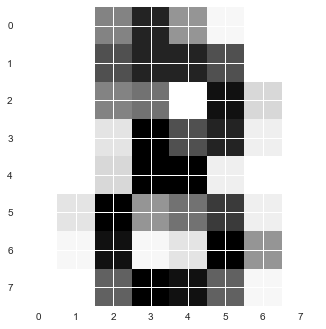

In [73]:
plt.imshow(df.data[8].reshape([8, 8]))

La matriz equivale al número 8. Nuestro objetivo es abstraer las principales características de los trazos al momento de escribir. Para ello implementaremos un Análisis de Componentes Principales. Su implementación se encuentra en la clase `PCA` del módulo `decomposition` de la librería `sklearn`.

##### **`Reduciendo dimensiones`**

Sabemos que la representación afable para el computador es una matriz con 64 columnas, donde cada una representa un porcentaje en la escala de grises. Esta representación es poco afable para nosotros.

In [74]:
print("Dimensión original de la base:",df.data.shape)

Dimensión original de la base: (1797, 64)


Implementemos un modelo de reducción a dos dimensiones, asumiendo que ésta es la representación más afable para el ojo humano. Partamos por importar `PCA`.

El primer paso es instanciar un objeto con la clase PCA donde ingresamos el número de componentes que deseamos extraer con el argumento `n_components`. En este caso lo realizaremos con 2.

Posterior a la creación del objeto, podemos ingresar los datos mediante fit_transform. La función ejecutará dos procesos:

1.	`Centra los datos`: Resta la media empírica a cada valor de la variable de forma de dejarlos centrados en la misma media.
2.	`Implementación del modelo`: Posteriormente ingresa los datos al método que descompone la matriz a una serie de eigenvalues.

In [75]:
from sklearn.decomposition import PCA

dimred = PCA(n_components = 2)
project_x = dimred.fit_transform(df.data)

La implementación del modelo la guardamos en el objeto `project_x`. Si solicitamos las dimensiones con `shape`, observamos que pasamos de 64 a 2 columnas.

In [76]:
print("La nueva dimensión de la base es de:",project_x.shape)

La nueva dimensión de la base es de: (1797, 2)


#### **4 - ¿Y qué signiﬁca todo esto?**

Hasta el momento hemos realizado una serie de transformaciones, pero no obtenemos resultados tangibles al respecto. Lo que podemos hacer es graﬁcar cada una de las dos dimensiones para intentar hacer sentido al respecto.

Implementaremos un diagrama de dispersión con el método `plt.scatter`, donde ingresamos cada una de las dimensiones y modiﬁcamos los atributos visuales de los puntos para identiﬁcar cada número con `df.target`. Finalmente implementamos `colorbar` para añadir una leyenda discreta a cada valor.

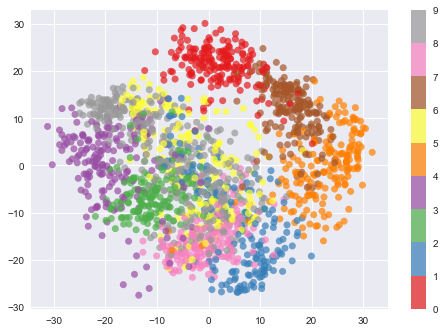

In [77]:
plt.scatter(project_x[:, 0], project_x[:, 1], c=df.target, edgecolor='none', alpha=.7, cmap='Set1') 
plt.colorbar()

Resulta que ambas dimensiones representan atributos sobre los trazos de los números. Los trazos entre los 4 y los 9 tienden a ser similares de igual manera que 7 y 5.

#### **4 - Maximizando varianza**

Retomemos el signiﬁcado del Análisis de Componentes Principales: `buscar aquellas dimensiones que maximicen la varianza total de una matriz ﬁnita de datos`.

Así, parte importante de la implementación de PCA es el estimar cuántos elementos son necesarios para obtener el máximo de varianza explicada. Solicitemos la varianza explicada de cada dimensión de nuestro primer modelo.

In [78]:
print("La varianza explicada de cada dimensión es de:",dimred.explained_variance_ratio_)
print("En conjunto, ambas dimensiones explican la varianza en un: ", sum(dimred.explained_variance_ratio_))

La varianza explicada de cada dimensión es de: [0.14890594 0.13618771]
En conjunto, ambas dimensiones explican la varianza en un:  0.2850936482369777


Estos números se pueden mejorar de forma substancial. Para obtener una evaluación agnóstica de la cantidad de dimensiones, podemos instanciar un objeto `PCA` sin declarar la cantidad de dimensiones en `n_components`. Esta información la graﬁcaremos de la siguiente manera:

1.	Primero extraemos la cantidad de dimensiones estimadas por el modelo. Un punto a mencionar es que el límite superior de la cantidad de dimensiones es $\hat 𝑋_𝑑 = 𝑝$.

2.	Graﬁcaremos el porcentaje de varianza explicada de cada elemento en barras verticales.

3.	Para visualizar la varianza acumulada a lo largo de las dimensiones, utilizamos `plt.step`.

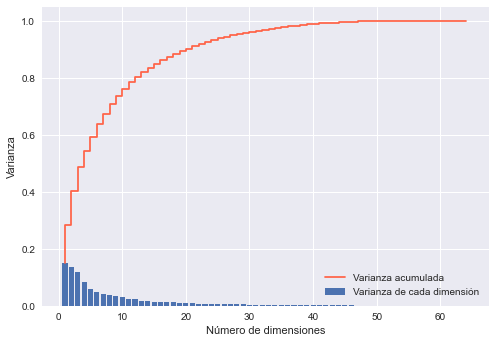

In [79]:
fetch_dims = PCA().fit(df.data) 
dims_quant = len(fetch_dims.components_)

plt.bar(range(1, dims_quant + 1),fetch_dims.explained_variance_ratio_,label="Varianza de cada dimensión")
plt.step(range(1,len(fetch_dims.components_) + 1), np.cumsum(fetch_dims.explained_variance_ratio_), color='tomato', label="Varianza acumulada")
plt.xlabel('Número de dimensiones') 
plt.ylabel('Varianza') 
plt.legend()

Se observa que con alrededor de 10 dimensiones alcanzamos un 80% de varianza explicada. Después de la 10 dimensión la curva de varianza acumulada tiende a suavizarse, y cuando se alcanzan 30 dimensiones la cantidad de varianza explicada por cada dimensión es cercana a 0.

Factoricemos nuestro modelo con `d=10`. Explicamos un 74% de la varianza con 10 dimensiones.

In [80]:
pca = PCA(n_components=10)
project_x = pca.fit_transform(df.data)

print("Varianza acumulada con 10 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 10 dimensiones: 0.7382262239711577


#### **5 - ¿Qué signiﬁca cada componente?**

Hasta el momento sabemos el objetivo general del PCA y cómo refactorizar el modelo para aumentar su capacidad explicativa. Pero cada una de las dimensiones resume parte importante de cómo se efectúa cada traza que permite identiﬁcar un número.

Sabemos que cada número en la base está representado por un array de 64 dígitos entre 0 y 1.

In [81]:
df.data[6]

array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
       14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
        0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
       11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.])

La representación aproximada de una imagen mediante PCA se realiza en base a la `combinación lineal de factores`. En este caso optimizamos nuestro algoritmo para extraer las primeras 10 dimensiones que representan el mapeo de un número, por lo que la representación de una imagen se lograría:

$$  imagen(x) = \mu + \sum_{i=1}^{10} \lambda_i \ x_i $$

Así, la reconstrucción de cada imagen es una conjetura de coeﬁcientes $\lambda_i$ estimados y multiplicados por la matriz entre 0 y 1 de las trazas.

Podemos visualizar el proceso de reconstrucción de imágenes con el siguiente código con la función `plot_pca_components`.

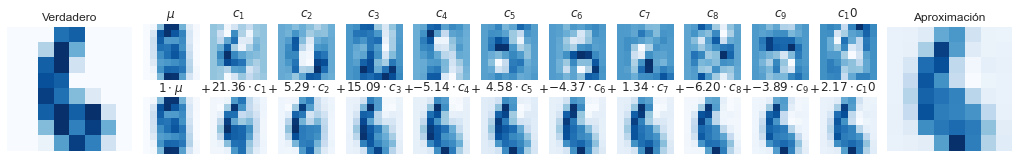

In [82]:
gfx.plot_pca_components(df.data[6], project_x[6], pca.mean_, pca.components_);

### **`Agrupación desde Machine Learning`**

#### **1 - Algoritmos de agrupación**

A lo largo de la lectura estudiamos la reducción de dimensionalidad como un método de aprendizaje no supervisado: tenemos una matriz de datos y nosotros tenemos poca información sobre cómo se comportan las dimensiones latentes.

El otro método de aprendizaje es la agrupación (o clustering en la jerga inglesa). La tarea principal de los algoritmos de agrupación es `dividir los datos en una serie de grupos en base a alguna medida de similitud entre los puntos`. Si bien la agrupación busca asignar etiquetas de similar manera que las estrategias de clasiﬁcación, en los métodos de agrupación `no tenemos certeza sobre la cantidad de grupos emergentes`.

Implementar algoritmos de agrupación dentro del ﬂujo de análisis facilita la representación de la estructura de los datos así como el descubrimiento de nuevos patrones.

#### **2 - KMeans**

La idea de kMeans es desarrollar una segmentación de vectores en un espacio `d-dimensional` de manera tal de inferir grupos que no se sobrepongan. El método clásico para obtener una serie de clusters se basa en:

1.	Asignar una cantidad `k` de clusters: Por lo general el investigador debe probar con distintos valores de `k`.

2.	Asignar a cada observación en el espacio al cluster `más cercano`: Los clusters se generan a partir de la media aritmética de todos los puntos cercanos al cluster.

3.	Por cada cluster, actualizar su centroide como la media para todos sus puntos asignados.

4.	Iterar los puntos 2 y 3 hasta que se satisfaga algún criterio.


##### **`Implementación`**

Para demostrar la aplicación de kMeans generaremos un caso artiﬁcial con `make_blobs`, que permite generar "grupos de datos siguiendo una función Gausiana Isotrópica". Por Gausiana entendemos una distribución normal, y por Isotrópica entendemos una distribución normal donde la matriz de covarianza se simpliﬁca a la matriz de identidad $Σ = σ^2 𝐼$.

La función `make_blobs` se encuentra en el módulo `datasets` de la librería `sklearn`. La función necesita de la cantidad de casos a simular en total deﬁnidos en `n_clusters`, así como los parámetros media (`centers`) y varianza (`cluster_std`). En este caso generamos un array de arrays donde deﬁnimos las coordenadas de cada blob a generar, así como un array que contiene la varianza asociada a cada blob. Como con toda simulación, es necesario deﬁnir una semilla pseudoaleatoria para asegurar replicabilidad de los resultados.

`make_blobs` retornará las coordenadas para cada punto en el objeto `X_mat` y la pertenencia de cada punto a alguna agrupación.

Para este caso estamos simulando 3000 casos repartidos en 7 grupos.

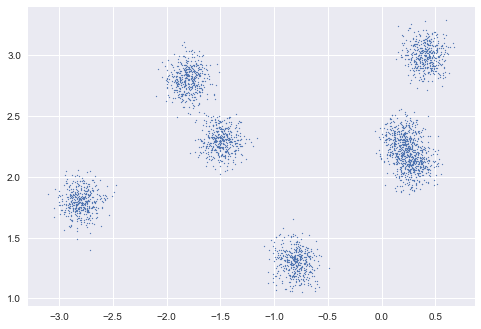

In [83]:
# importamos make_blobs
from sklearn.datasets import make_blobs

# Definimos los centros	
bivariate_mu_params = list([[ 0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-1.8, 2.8], [-.8, 1.3], [.3, 2.1], [.4, 3]])

# Definimos las varianzas
bivariate_sigma_params = list([0.1, 0.1, 0.1, 0.1, 0.1, .1, .1])

X_mat, y_vec = make_blobs(n_samples=3000, centers=bivariate_mu_params, cluster_std=bivariate_sigma_params, random_state=11238)

plt.scatter(X_mat[:, 0], X_mat[:, 1], s=1)

Para implementar `KMeans`, lo importamos desde el módulo `cluster` de la librería `sklearn`. La forma más fácil de instanciar una clase `KMeans`, asignamos la cantidad de grupos a identiﬁcar (que se declara en `n_clusters`) y una semilla pseudoaleatoria para replicabilidad (declarada con `random_state`).

Existen más especiﬁcaciones en esta etapa como `n_init` que deﬁne la cantidad de veces que el algoritmo será iniciado con distintos centroides, así como `max_iter` que deﬁne la cantidad máxima de iteraciones en una etapa.

In [84]:
# importamos el modulo
from sklearn.cluster import KMeans

# instanciamos KMeans en un nuevo objeto
kmeans = KMeans(n_clusters=7, random_state=11238) 

# obtenemos los resultados
fit_results = kmeans.fit_predict(X_mat)

In [85]:
kmeans.labels_

array([4, 5, 6, ..., 6, 6, 2])

In [86]:
pd.Series(kmeans.labels_).value_counts('%')

2    0.144000
1    0.143667
3    0.143000
4    0.142667
0    0.142667
5    0.142333
6    0.141667
dtype: float64

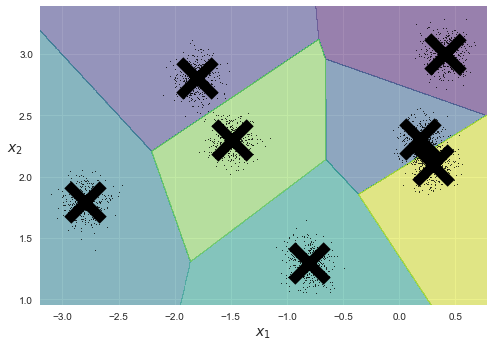

In [87]:
gfx.plot_decision_boundaries(kmeans, X_mat)

#### **3 - Inercia del modelo**

Si bien no podemos medir el desempeño del modelo (porque no tenemos etiquetas previas), podemos medir la distancia promedio entre cada número y su centroide mediante la inercia, entendida como la suma de distancias cuadráticas. Esto lo logramos mediante la métrica de inercia.

Podemos obtener la inercia de un modelo creado con `KMeans` al solicitar `.inertia_`. En este caso la inercia asociada al modelo cuando estimamos 7 clusters es de 56.

In [88]:
kmeans.inertia_

56.261155902996656

`¿Cuál es el resultado esperado respecto a la inercia de un modelo?` Buscamos aquél que presente una reducción substancial de las distancias cuadráticas entre los puntos y sus centroides. Así, estamos frente a una estrategia de minimización de pérdidas.

De manera similar al promedio del error cuadrático en los modelos lineales, la inercia sólo tiene sentido en la medida que comparamos entre múltiples candidatos. Para ello vamos a estimar la inercia cuando aumentamos la cantidad de clusters de 1 a 10 en pasos de a 1. Compararemos la inercia de cada modelo candidato mediante un gráﬁco.

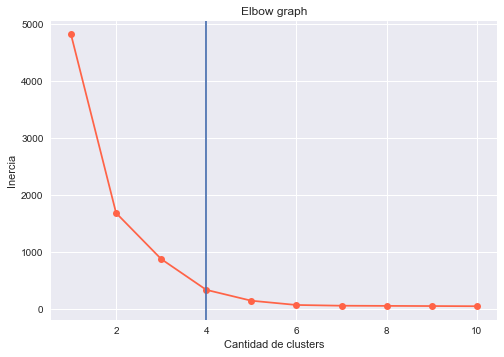

In [89]:
# generamos un array para guardar los resultados. 
inertia = []

# Para cada número entre 1 y 10
for i in range(1, 11):
    # Agregamos la inercia 
    inertia.append(KMeans(n_clusters=i, random_state=11238).fit(X_mat).inertia_)

# graficamos el resultado
plt.plot(range(1, 11), inertia, 'o-', color='tomato') 
plt.xlabel("Cantidad de clusters") 
plt.ylabel("Inercia")
plt.title("Elbow graph") 
plt.axvline(4)

Una estrategia ineﬁciente es escoger el modelo candidato que minimice la inercia sin tener en consideración el resto de los modelos, dado que siempre tenderá a minimizarse en la medida que aumentamos la cantidad de grupos. Mediante el gráﬁco podemos encontrar un punto de inﬂexión que generalmente se encuentra antes de que la inercia se estabilice. El gráﬁco sugiere que un modelo que agrupe los datos entre 4 grupos minimiza la distancia entre los puntos y sus centroides.

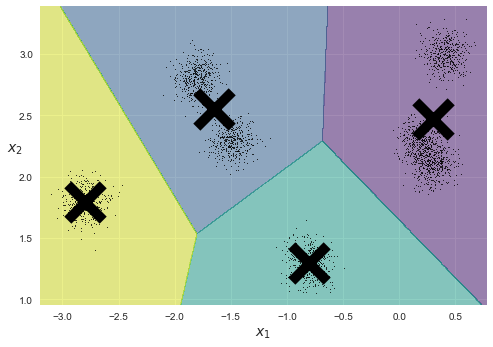

In [90]:
kmeans = KMeans(n_clusters=4, random_state=11238) 
fit_results = kmeans.fit_predict(X_mat) 
gfx.plot_decision_boundaries(kmeans, X_mat)

#### **4 - Variabilidad del algoritmo de agrupación**

En la variante más simple del algoritmo KMeans los centroides se inicializan de forma aleatoria, y éste busca mejorar de forma gradual la posición de los centroides.

Un problema substancial de esto es que se pueden llegar a soluciones distintas dependiendo de la semilla pseudoaleatoria.

En el siguiente ejemplo graﬁcamos dos soluciones para un modelo con 7 grupos, donde sólo varían `random_state`.

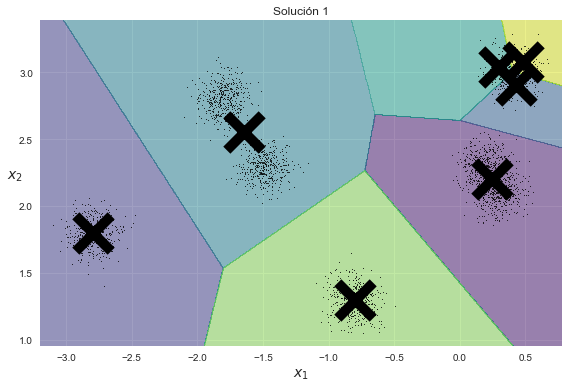

In [92]:
init_1 = KMeans(n_clusters=7, random_state=5342, init="random", n_init=1)
init_1.fit(X_mat)

init_2 = KMeans(n_clusters=7, random_state=138, init="random", n_init=1) 
init_2.fit(X_mat)

gfx.plot_decision_boundaries(init_1, X_mat) 
plt.title('Solución 1')
plt.tight_layout()

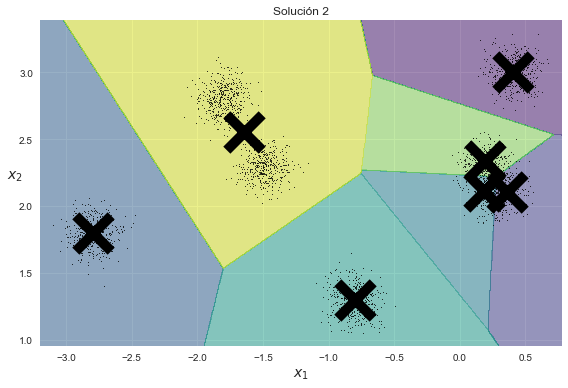

In [93]:
plt.title('Solución 2') 
gfx.plot_decision_boundaries(init_2, X_mat) 
plt.tight_layout()